Parâmetros iniciais: Inclinação (m) = 4.5, Intercepto (b) = -4.0


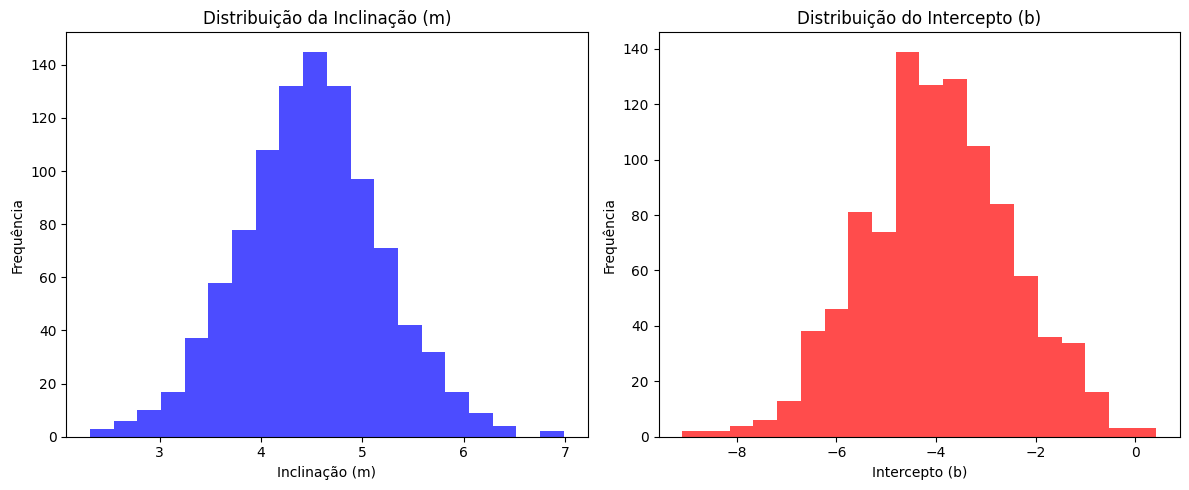

Inclinação média: 4.495974502254949, Desvio padrão: 0.6968788107507214
Intercepto médio: -3.9599481683472906, Desvio padrão: 1.4805661800635381


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definindo os dados
x_data = np.array([1, 2, 3])
y_data = np.array([1, 4, 10])

# Função de ajuste linear
def linear_model(x, m, b):
    return m * x + b

# Ajuste inicial
popt, pcov = curve_fit(linear_model, x_data, y_data)
m_initial, b_initial = popt
print(f"Parâmetros iniciais: Inclinação (m) = {m_initial}, Intercepto (b) = {b_initial}")

# Definindo incertezas (assumindo um erro padrão constante para simplificação)
sigma_y = 1.0  # Incerteza fixa (pode ser ajustada)

# Parâmetros para o método de Monte Carlo
num_simulations = 1000
m_simulations = []
b_simulations = []

np.random.seed(42)  # Para reprodutibilidade

# Executando simulações de Monte Carlo
for _ in range(num_simulations):
    # Adiciona ruído gaussiano aos dados originais
    y_simulated = y_data + np.random.normal(0, sigma_y, len(y_data))
    
    # Ajusta os dados simulados
    popt, _ = curve_fit(linear_model, x_data, y_simulated)
    m_sim, b_sim = popt
    
    # Armazena os parâmetros ajustados
    m_simulations.append(m_sim)
    b_simulations.append(b_sim)

# Convertendo para numpy arrays para análise
m_simulations = np.array(m_simulations)
b_simulations = np.array(b_simulations)

# Plotando as distribuições dos parâmetros
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(m_simulations, bins=20, alpha=0.7, color='b')
plt.title('Distribuição da Inclinação (m)')
plt.xlabel('Inclinação (m)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(b_simulations, bins=20, alpha=0.7, color='r')
plt.title('Distribuição do Intercepto (b)')
plt.xlabel('Intercepto (b)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Resultados estatísticos
print(f"Inclinação média: {np.mean(m_simulations)}, Desvio padrão: {np.std(m_simulations)}")
print(f"Intercepto médio: {np.mean(b_simulations)}, Desvio padrão: {np.std(b_simulations)}")


Parâmetros iniciais: Inclinação (m) = 4.5, Intercepto (b) = -4.0


/tmp/ipykernel_1821/2524944962.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(linear_model, x_resampled, y_resampled)


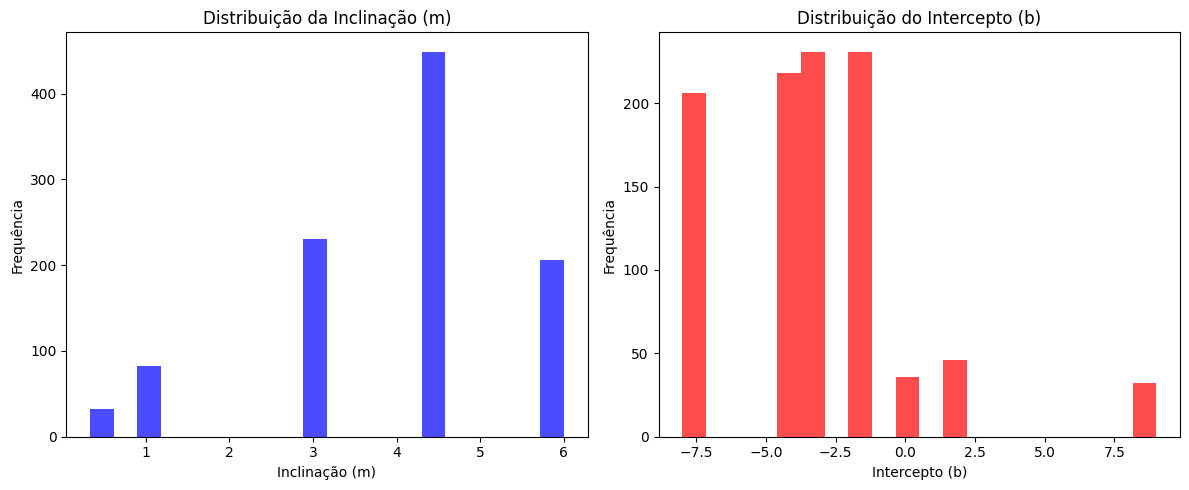

Inclinação média: 4.042166666667165, Desvio padrão: 1.5276433466103998
Intercepto médio: -3.410500000001004, Desvio padrão: 3.401505512267629


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definindo os dados
x_data = np.array([1, 2, 3])
y_data = np.array([1, 4, 10])

# Função de ajuste linear
def linear_model(x, m, b):
    return m * x + b

# Ajuste inicial
popt, pcov = curve_fit(linear_model, x_data, y_data)
m_initial, b_initial = popt
print(f"Parâmetros iniciais: Inclinação (m) = {m_initial}, Intercepto (b) = {b_initial}")

# Parâmetros para o método de bootstrap
num_bootstrap_samples = 1000
m_bootstrap = []
b_bootstrap = []

np.random.seed(42)  # Para reprodutibilidade

# Executando o método de bootstrap
for _ in range(num_bootstrap_samples):
    # Reamostra com reposição
    indices = np.random.randint(0, len(x_data), len(x_data))
    x_resampled = x_data[indices]
    y_resampled = y_data[indices]
    
    # Ajusta os dados reamostrados
    popt, _ = curve_fit(linear_model, x_resampled, y_resampled)
    m_boot, b_boot = popt
    
    # Armazena os parâmetros ajustados
    m_bootstrap.append(m_boot)
    b_bootstrap.append(b_boot)

# Convertendo para numpy arrays para análise
m_bootstrap = np.array(m_bootstrap)
b_bootstrap = np.array(b_bootstrap)

# Plotando as distribuições dos parâmetros
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(m_bootstrap, bins=20, alpha=0.7, color='b')
plt.title('Distribuição da Inclinação (m)')
plt.xlabel('Inclinação (m)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(b_bootstrap, bins=20, alpha=0.7, color='r')
plt.title('Distribuição do Intercepto (b)')
plt.xlabel('Intercepto (b)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Resultados estatísticos
print(f"Inclinação média: {np.mean(m_bootstrap)}, Desvio padrão: {np.std(m_bootstrap)}")
print(f"Intercepto médio: {np.mean(b_bootstrap)}, Desvio padrão: {np.std(b_bootstrap)}")


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definindo os dados
x_data = np.array([1, 2, 3])
y_data = np.array([1, 4, 10])

# Função de ajuste linear
def poly_model(x, a, b, c):
    return a * x * x + b * x + c

# Ajuste inicial
popt, pcov = curve_fit(poly_model, x_data, y_data)
a_initial, b_initial, c_initial = popt

print(f"Parâmetros encontrados: (a) = {a_initial}, (b) = {b_initial}, (c) = {c_initial}")

Parâmetros encontrados: (a) = 1.4999999999999996, (b) = -1.4999999999999987, (c) = 0.9999999999999991


/tmp/ipykernel_1821/353096763.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(poly_model, x_data, y_data)
